# PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões

#### $\textit{- Análise do dataset California Housing e aplicação de alguns tipos de regressão para predizer o preço médio de uma casa }$
#### $\textit{Autor: Victor Rocha da Silva - PMR3508-2020-177}$

## 1. Preparando os dados (Data Prep)
### 1.1 Importando bibliotecas e dados
- Primeiramente, vamos importar algumas bibliotecas que serão úteis ao trabalhar com esses dados e, logo em seguida, o dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import geopy

In [2]:
df_train = pd.read_csv("../input/atividade-regressao-PMR3508/train.csv", index_col=['Id'])

df_test = pd.read_csv("../input/atividade-regressao-PMR3508/test.csv", index_col=['Id'])

- Aqui temos uma representação de um trecho do dataset e de como ele se estrutura:

In [3]:
print('Formato do Dataset:', df_train.shape)

Formato do Dataset: (14448, 9)


In [4]:
df_train.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Id,,,,,,,,,
15817,-120.85,37.57,27,819,157,451,150,34934,193800
6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
19262,-118.11,33.92,32,1016,190,729,177,43000,151300
19743,-118.12,34.15,35,1760,447,984,384,34167,198200
7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


### 1.2 Lidando com dados faltantes (*missing data*)
- Aqui faremos uma análise acerca dos dados faltantes, caso existam, verificando qual a melhor maneira de lidar com eles.

Com o comando *describe* podemos ter uma visão estatística simples do nosso dataset:

In [5]:
df_train.describe()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.563050,35.625804,28.700028,2622.627284,535.628391,1413.978405,496.934109,38747.577450,207556.603267
std,2.008096,2.138690,12.587508,2145.423570,416.800426,1095.060629,376.873380,19091.513037,116441.436255
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,14999.000000
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,25596.500000,119300.000000
50%,-118.490000,34.250000,29.000000,2116.000000,432.000000,1160.000000,407.000000,35334.000000,179950.000000
75%,-118.000000,37.710000,37.000000,3131.250000,645.250000,1705.000000,602.000000,47500.000000,266100.000000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,150001.000000,500001.000000


Com o comando *info* podemos ver a quantidade de valores não nulos (não faltantes) no dataset:

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 15817 to 9756
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   median_age          14448 non-null  int64  
 3   total_rooms         14448 non-null  int64  
 4   total_bedrooms      14448 non-null  int64  
 5   population          14448 non-null  int64  
 6   households          14448 non-null  int64  
 7   median_income       14448 non-null  int64  
 8   median_house_value  14448 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.1 MB


Como podemos perceber, **não existem dados faltantes nesse dataset**, o que torna a preparação de dados mais simples.

## 2. Interpretação e análise do data frame
Nessa etapa, temos como objetivo fazer uma análise geral do nosso dataframe, analisando a correlação entre as variáveis e interpretando os dados que temos. Os gráficos serão uma ferramenta de grande importância para fazer tal análise.

### 2.1 Visão geral da base de dados
Começaremos nossa análise com alguma observações simples e relevantes sobre a base de dados.

In [7]:
df_train.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Id,,,,,,,,,
15817,-120.85,37.57,27,819,157,451,150,34934,193800
6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
19262,-118.11,33.92,32,1016,190,729,177,43000,151300
19743,-118.12,34.15,35,1760,447,984,384,34167,198200
7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


A nossa base de dados apresenta 9 *features*, sendo uma delas a variável de classe *median_house_value* que queremos prever.

### 2.2 Busca por correlações entre as variáveis
Precisamos buscar **correlações** entre as variáveis, verificando quais influem significativamente no preço da casa e quais não, para montar um modelo adequado e eficiente. Além disso, é valido enxergar também quais variáveis estao ligadas entre si na base. 

Para fazer isso, vamos ter que aplicar o LabelEncoder nos dados, da biblioteca scikit-learn.

In [8]:
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()

correlationMap = df_train.apply(preprocessing.LabelEncoder().fit_transform).corr()
correlationMap.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924265,-0.108463,0.021323,0.059517,0.104862,0.046785,-0.016769,-0.043265
latitude,-0.924265,1.000000,0.015517,-0.022133,-0.061980,-0.123298,-0.069391,-0.090014,-0.158218
median_age,-0.108463,0.015517,1.000000,-0.377217,-0.335666,-0.310299,-0.314679,-0.153690,0.090254
total_rooms,0.021323,-0.022133,-0.377217,1.000000,0.903543,0.829951,0.895935,0.267129,0.193667
total_bedrooms,0.059517,-0.061980,-0.335666,0.903543,1.000000,0.871452,0.978588,0.008414,0.075754


O jeito mais simples de enxergar essas correlações é plotando um **Heat Map** da biblioteca seaborn.
Nele, como podemos ver na legenda da direita, quanto mais clara é a célula, maior é a correlação, e quanto mais escura é a célula, menor é a correlação entre as variáveis.

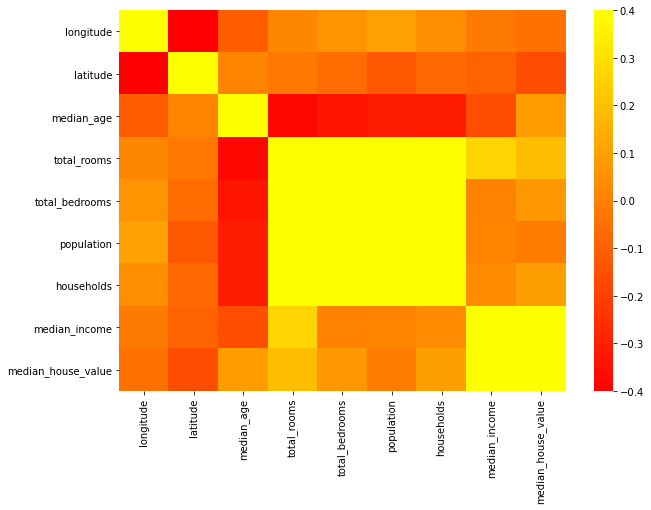

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(correlationMap, vmin=-0.4, vmax=0.4, cmap = 'autumn')

Podemos tirar algumas conclusões interessantes dessa correlação representada no Heat Map:
- As variáveis **total_rooms**, **total_bedrooms**, **population** e **households** estão fortemente relacionadas entre si, porque, logicamente, quanto mais pessoas ou famílias na casa, ela deverá ser maior (ter mais salas) e ter mais quartos.
- Todas as demais variáveis apresentam certa correlação entre si, mas nada tão relevante ao nosso modelo
- A terceira conclusão e, provavelmente, a mais importante para o modelo é que as variáveis que apresentam maior relação com o preço médio da casa (*median_house_value*) são, principalmente, **median_income**, **total_rooms**, **total_bedrooms** e **median_age**, o que mostra coerência na base de dados, já que retrata um resultado bem intuitivo.

Feita essa análise de correlação, podemos partir agora para uma análise exploratória da base de dados.

### 2.3 Análise exploratória dos dados
Iremos explorar os dados da base California Housing e obter algumas conclusões acerca dos dados, principalmente usando gráficos. Espera-se que tanto essa etapa, como a busca por correlação seja útil na escolha dos atributos e criação do nosso modelo.
Para os gráficos, usaremos as bibliotecas Matplotlib e Seaborn, já importadas.

Vamos começar com um pairplot acerca de todas as variáveis:

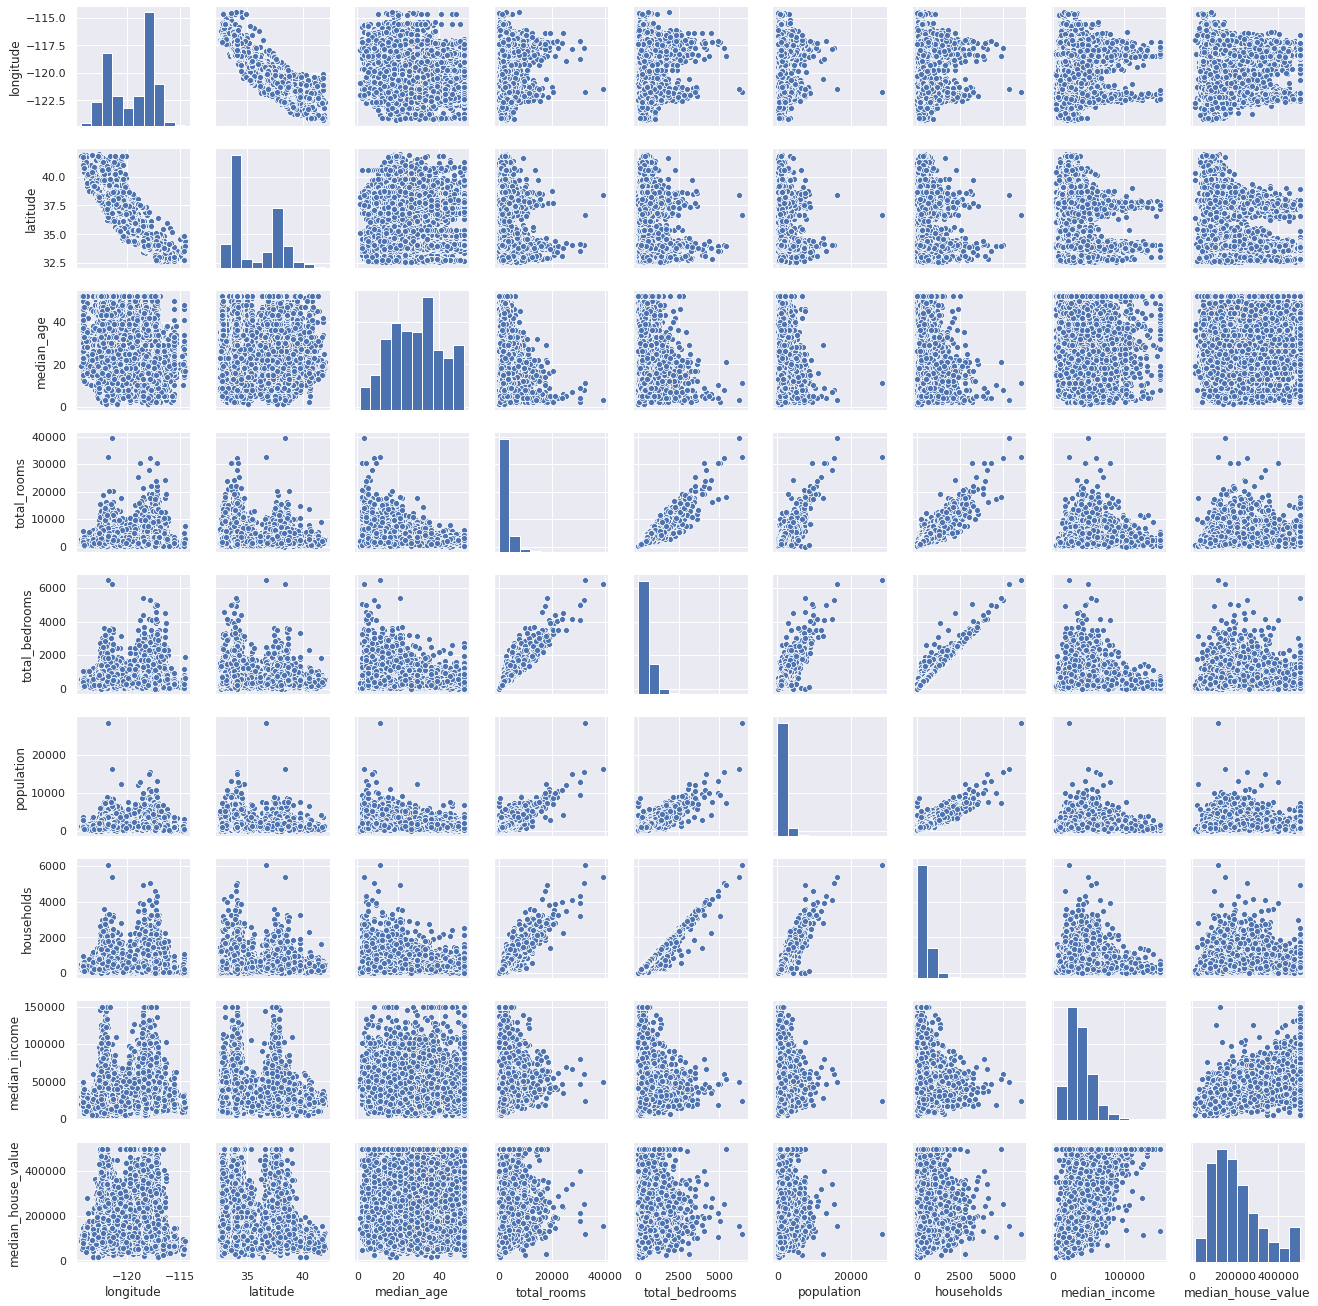

In [10]:
sns.set()
sns.pairplot(df_train, palette='mako', height=2)

Podemos perceber que as coordenadas geográficas das casas da base de dados formam uma faixa contínua e apresentam valores relativamente próximos. Vemos ainda que predominam no dataset as pessoas que moram na residência com renda média inferior a $100000; que quanto maior o número de cômodos na casa, maior tende a ser o número de quartos; e, por motivos óbvios, quanto maior a população da casa, maior tende a ser o número de quartos. Além disso, reforçando o que já haviamos concluído anteriormente na matriz de correlação, vemos que há uma grande tendência de quanto maior é a renda média da casa, maior é o preço da casa (o que é algo natural).

Vamos agora fazer alguns plots interessantes acerca das conclusões que tiramos acima e tentar identificar mais alguma informação útil.

Começaremos fazendo uma análise mais geográfica do nosso dataset, analisando onde se concentram as casas de maior valor médio e por que, o que nos ajudará a entender melhor a disposição das casas pela Califórnia. Uma ótima maneira de plotar os mapas já com as coordenadas do dataset é usar a biblioteca Plotly:

In [11]:
import plotly.express as px

fig = px.scatter_mapbox(df_train, lat="latitude", lon="longitude", color="median_house_value", size="population",
                  color_continuous_scale=px.colors.sequential.solar, size_max=15, zoom=4,
                  mapbox_style="carto-positron")
fig.show()

Podemos perceber que as casas mais caras encontram-se, no geral, próximas ao litoral e próximas das grandes cidades da Califórnia, como San Francisco, San Diego e, destacadamente, Los Angeles.
Isso será muito útil no momento da predição, pois podemos criar algumas variáveis extras que auxiliem nosso regressor a prever o preço médio das casas.

Vamos analisar agora a relação entre a renda média na casa com o preço da casa em si, já que essa foi uma importante correlação encontrada:

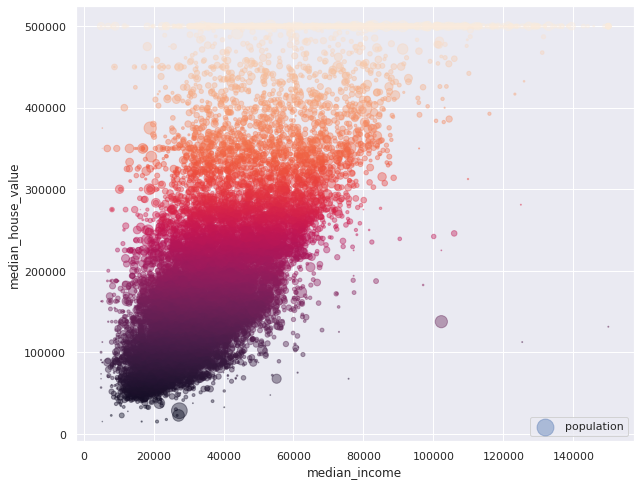

In [12]:
df_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4, s=df_train["population"]/50, 
             label="population", c="median_house_value", figsize=(10,8),
             cmap=plt.get_cmap("rocket"), colorbar=False)

Mais alguns gráficos relevantes:

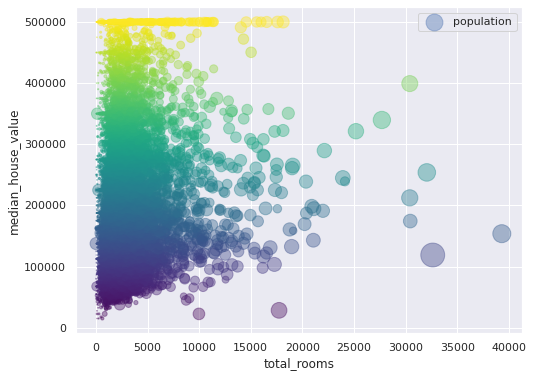

In [13]:
df_train.plot(kind="scatter", x="total_rooms", y="median_house_value", alpha=0.4, s=df_train["population"]/50, 
             label="population", c="median_house_value", figsize=(8,6),
             cmap=plt.get_cmap("viridis"), colorbar=False)

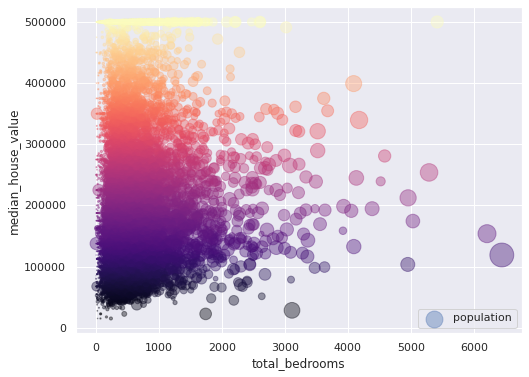

In [14]:
df_train.plot(kind="scatter", x="total_bedrooms", y="median_house_value", alpha=0.4, s=df_train["population"]/50, 
             label="population", c="median_house_value", figsize=(8,6),
             cmap=plt.get_cmap("magma"), colorbar=False)

Vemos que o número de cômodos e de quartos têm sim influência sobre o preço médio das casas, mas isso não fica tão evidente nos gráficos acima, pois devemos lembrar que cada observação do dataset corresponde a uma certa região da California, em que foi feito um agrupamento de casas e, consequentemente, ao calcular o preço médio, pode ser que a relação cômodos/quartos-preço fique omitida/atenuada. Muitas vezes a média esconde mais do que mostra, principalmente quando se trata de conceitos geográficos e sociais.

## 3. Feature Engineering

Nessa etapa, vamos aproveitar as conclusões obtidas na análise exploratória para criar algumas variáveis que nos ajudem a predizer o preço da casa.

### 3.1 Distância até uma grande/importante cidade

Para esse atributo, iremos utilizar a biblioteca Geopy para medir as distâncias entre as regiões e as grandes cidades. Vamos utilizar as três principais cidades da Califórnia: Los Angeles, San Francisco e San Diego (pelo fato de serem grandes centros de influência), sendo que consideraremos como distância até uma grande cidade sempre a menor distância entre as três calculadas.

Primeiro, precisamos definir uma função que calcula essas distâncias para cada região do dataset.

In [15]:
from geopy.distance import geodesic

coord_LA = (34.0536909, -118.2427666)
coord_SD = (32.7174209, -117.1627714)
coord_SF = (37.7790262, -122.4199061)

def dist_cidades(df_train):
    coord_casa = (df_train["latitude"], df_train["longitude"])
    df_train["dist_to_city"] = min(geodesic(coord_casa, coord_SF).km, geodesic(coord_casa, coord_LA).km, geodesic(coord_casa, coord_SD).km)
    
    return df_train

Agora vamos aplicar a função no nosso dataset, criando essa nova feature:

In [16]:
df_train = df_train.apply(dist_cidades, axis = 1)

In [17]:
df_train.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,dist_to_city
Id,,,,,,,,,,
15817,-120.85,37.57,27.0,819.0,157.0,451.0,150.0,34934.0,193800.0,140.423819
6236,-117.74,34.06,48.0,2438.0,599.0,1508.0,548.0,28983.0,129200.0,46.422250
19262,-118.11,33.92,32.0,1016.0,190.0,729.0,177.0,43000.0,151300.0,19.245755
19743,-118.12,34.15,35.0,1760.0,447.0,984.0,384.0,34167.0,198200.0,15.570969
7272,-120.63,37.41,27.0,2083.0,444.0,1462.0,479.0,26439.0,69100.0,163.290497


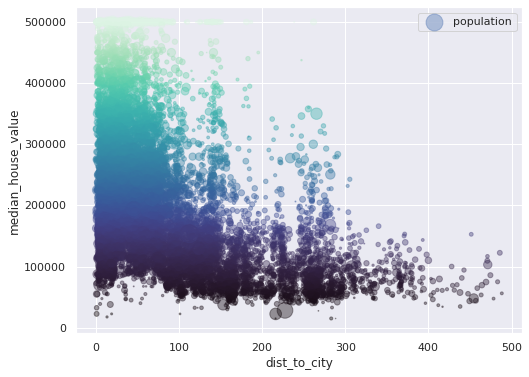

In [18]:
df_train.plot(kind="scatter", x="dist_to_city", y="median_house_value", alpha=0.4, s=df_train["population"]/50, 
             label="population", c="median_house_value", figsize=(8,6),
             cmap=plt.get_cmap("mako"), colorbar=False)

Percebemos que quanto maior a distância até uma grande cidade, menor tende a ser o preço médio da casa

### 3.2 Features extras
Aqui, vamos criar uma feature para o número de cômodos por casa e outra para o número de pessoas por quarto em cada casa:

In [19]:
df_train['rooms_per_household'] = df_train['total_rooms']/df_train['households']
df_train['people_per_bedroom'] = df_train['population']/df_train['total_bedrooms']

In [20]:
df_train.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,dist_to_city,rooms_per_household,people_per_bedroom
Id,,,,,,,,,,,,
15817,-120.85,37.57,27.0,819.0,157.0,451.0,150.0,34934.0,193800.0,140.423819,5.460000,2.872611
6236,-117.74,34.06,48.0,2438.0,599.0,1508.0,548.0,28983.0,129200.0,46.422250,4.448905,2.517529
19262,-118.11,33.92,32.0,1016.0,190.0,729.0,177.0,43000.0,151300.0,19.245755,5.740113,3.836842
19743,-118.12,34.15,35.0,1760.0,447.0,984.0,384.0,34167.0,198200.0,15.570969,4.583333,2.201342
7272,-120.63,37.41,27.0,2083.0,444.0,1462.0,479.0,26439.0,69100.0,163.290497,4.348643,3.292793


## 4. Pré-processamento dos dados
Finalmente, tendo criado todas as nossas features a analisado a base de dados, podemos fazer um pré-processamento nos dados, que irá auxiliar no nosso regressor.

Iremos aplicar uma normalização linear nos valores do dataset, já que nossas features apresentam intervalos muito diferentes de valores. O objetivo da normalização é alterar os valores das colunas numéricas no dataset para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Vamos precisar do módulo de pré-processamento da biblioteca scikit-learn e do utilitário MinMaxScaler.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Vamos separar o nosso dataset em atributos e rótulo:

In [22]:
Y = df_train.pop('median_house_value').values.astype(float)

X = df_train

In [23]:
X = scaler.fit_transform(X)

## 5. Avaliação de regressores
Vamos testar alguns tipos de regressor e ver aquele que obtém o melhor desempenho, o que será avaliado pelo Root Mean Squared Log Error (RMSLE), que definiremos abaixo. O melhor regressor é aquele que apresentar o menor RMSLE, que será usado para realizarmos a predição.

In [24]:
from sklearn.model_selection import cross_val_score

def rmsle(y_test,y_pred):
    return np.sqrt(np.mean((np.log(np.abs(y_pred)+1)-np.log(np.abs(y_test)+1))**2))

# Aqui vamos definir um avaliador simples para os regressores usando validação cruzada
def scorer(model, X_train, Y_train):
    score = np.mean(cross_val_score(model, X_train, Y_train, cv = 10))
    return score

### 5.1 Regressão linear

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Fazendo um holdout dentro da própria base de treino apenas para avaliar o erro e achar o melhor regressor
X_train, xTEST, Y_train, yTEST = train_test_split(X, Y, test_size=0.3) 

LR = LinearRegression()
LR.fit(X_train,Y_train)

pred = LR.predict(xTEST)

RMSLE = rmsle(yTEST, pred)
print("O RMSLE para o Regressor Linear é de: ", RMSLE)

O RMSLE para o Regressor Linear é de:  0.4355890478096039


In [26]:
print("A acurácia do Regressor Linear é de: ", scorer(LR, X_train, Y_train))

A acurácia do Regressor Linear é de:  0.6395918076238971


### 5.2 Regressão Lasso

In [27]:
from sklearn.linear_model import Lasso

# Fazendo um holdout dentro da própria base de treino apenas para avaliar o erro e achar o melhor regressor
X_train, xTEST, Y_train, yTEST = train_test_split(X, Y, test_size=0.3) 

L = Lasso()
L.fit(X_train,Y_train)

pred = L.predict(xTEST)

RMSLE = rmsle(yTEST, pred)
print("O RMSLE para o Regressor Lasso é de: ", RMSLE)

O RMSLE para o Regressor Lasso é de:  0.39874140367198857


In [28]:
print("A acurácia do Regressor Lasso é de: ", scorer(L, X_train, Y_train))

A acurácia do Regressor Lasso é de:  0.6430331797853258


### 5.3 Regressão Ridge

In [29]:
from sklearn.linear_model import Ridge

# Fazendo um holdout dentro da própria base de treino apenas para avaliar o erro e achar o melhor regressor
X_train, xTEST, Y_train, yTEST = train_test_split(X, Y, test_size=0.3) 

R = Ridge()
R.fit(X_train,Y_train)

pred = R.predict(xTEST)

RMSLE = rmsle(yTEST, pred)
print("O RMSLE para o Regressor Ridge é de: ", RMSLE)

O RMSLE para o Regressor Ridge é de:  0.4131091289545887


In [30]:
print("A acurácia do Regressor Ridge é de: ", scorer(R, X_train, Y_train))

A acurácia do Regressor Ridge é de:  0.6448142106550764


### 5.4 Regressão KNN

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# Fazendo um holdout dentro da própria base de treino apenas para avaliar o erro e achar o melhor regressor
X_train, xTEST, Y_train, yTEST = train_test_split(X, Y, test_size=0.3) 

KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

pred = KNN.predict(xTEST)

RMSLE = rmsle(yTEST, pred)
print("O RMSLE para o Regressor KNN é de: ",RMSLE)

O RMSLE para o Regressor KNN é de:  0.2943896499744944


In [32]:
print("A acurácia do Regressor KNN é de: ", scorer(KNN, X_train, Y_train))

A acurácia do Regressor KNN é de:  0.706478713192485


### 5.5 Regressão Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Fazendo um holdout dentro da própria base de treino apenas para avaliar o erro e achar o melhor regressor
X_train, xTEST, Y_train, yTEST = train_test_split(X, Y, test_size=0.3) 

RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)

pred = RFR.predict(xTEST)

RMSLE = rmsle(yTEST, pred)
print("O RMSLE para o Regressor Random Forest é de: ",RMSLE)

O RMSLE para o Regressor Random Forest é de:  0.24369227137452823


In [34]:
print("A acurácia do Regressor Random Forest é de: ", scorer(RFR, X_train, Y_train))

A acurácia do Regressor Random Forest é de:  0.7955227461793616


Usando como métrica para escolher o melhor regressor o Root Mean Squared Log Error (RMSLE), vemos claramente que o **Regressor Random Forest** é o que se destaca. Portanto, vamos usá-lo para fazer a nossa predição.

## 6. Predição
Feita toda a preparação de dados e seleção do melhor regressor, podemos finalmente prever o preço médio das casas do set de teste. 

Antes, vamos aplicar os mesmos procedimentos feitos no set de treino no set de teste:

In [35]:
# Distância até uma grande cidade
def dist_cidades(df_test):
    coord_casa = (df_test["latitude"], df_test["longitude"])
    df_test["dist_to_city"] = min(geodesic(coord_casa, coord_SF).km, geodesic(coord_casa, coord_LA).km, geodesic(coord_casa, coord_SD).km)
    
    return df_test

df_test = df_test.apply(dist_cidades, axis = 1)

# Features extras
df_test['rooms_per_household'] = df_test['total_rooms']/df_test['households']
df_test['people_per_bedroom'] = df_test['population']/df_test['total_bedrooms']

# Normalização dos dados
X_test = scaler.fit_transform(df_test)

Agora é só obter a predição:

In [36]:
RFR.fit(X,Y)
predict = RFR.predict(X_test)

print("O nosso Regressor Random Forest preveu os seguintes preços médios para as casas:", predict)

O nosso Regressor Random Forest preveu os seguintes preços médios para as casas: [422244.17 139227.    78369.   ... 180052.   156931.   114730.  ]


## 7. Submissão da predição

Precisamos agora transformar esse array com as predições em um data frame e em seguida exportá-lo para o formato .csv:

In [37]:
submission = pd.DataFrame(predict)

Vamos também acrescentar a coluna Id e renomear a coluna correspondente do data frame para *median_house_value*, que é o que estamos prevendo com o regressor:

In [38]:
submission[0] = df_test.index
submission[1] = predict
submission.columns = ['Id','median_house_value']

In [39]:
submission.head()

,Id,median_house_value
0,8609,422244.17
1,14610,139227.00
2,1557,78369.00
3,12875,145054.03
4,17821,179379.02


Agora, só precisamos exportar o nosso data frame com a predição para o formato .csv:

In [40]:
submission.to_csv('submission.csv',index = False)